In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
def get_data(filename):
	data = pd.read_table(filename,names=['user_id','item_id','rates','time_stamp'])
	a = pd.pivot_table(
		data,
		values='rates',
		index=['user_id'],
		columns=['item_id'],
		aggfunc=np.sum
		)
	a = np.array(a)
	return a

	# return 1 
	# data_dict = defaultdict( lambda :defaultdict(lambda :0))
	# # user_id item_id rates

	# for line in data.values:
	# 	data_dict[line[1]][line[0]] = line[2] 

	# data_frame = pd.DataFrame(data_dict)
	# data_frame.fillna(0,inplace=True)
	# return data_frame

def loss():
	pass


In [3]:
def train2(R,P,Q,K,steps=1000,alpha=0.002,beta=0.02):
	Q = Q.T
	for step in range(steps):
		for i in range(len(R)):
			for j in range(len(R[i])):
				if R[i][j] > 0:
					eij = R[i][j] - np.dot(P[i,:],Q[:,j])
					for k in range(K):
						P[i][k] = P[i][k] + alpha * ( 2 * eij * Q[k][j] - beta * P[i][k])
						Q[k][j] = Q[k][j] + alpha * ( 2 * eij * P[i][k] - beta * Q[k][j])
		eR = np.dot(P,Q)
		e = 0
		for i in range(len(R)):
			for j in range(len(R[i])):
				if R[i][j] > 0:
					e +=  pow(R[i][j] - np.dot(P[i,:],Q[:,j]),2)
					for k in range(K):
						e += (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2) )
		print(e)
		if e < 0.001:
			break
	return P,Q.T


In [7]:
loss_list=[]
step_list=[]
def matrix_factorization(R,P,Q,K,test_data,steps=2, alpha=0.0002, beta=0.02,batch_size=800):
	Q = Q.T
	min_size = min(test_data.shape[1] , R.shape[1])
	used_samples = np.zeros(min_size).reshape(-1)
	for step in range(steps):
		if not(np.where(used_samples==0)[0].shape[0]):
			break
		idxs = np.random.choice(np.where(used_samples == 0)[0], batch_size)
		r = np.zeros(R.shape)
		r[:, idxs] = R[:, idxs]
		t = np.zeros(test_data.shape)
		t[:, idxs] = test_data[:, idxs]

		for i in range(len(r)):
			for j in range(len(r[i])):
				if r[i][j] > 0:
					eij = r[i][j] - np.dot(P[i, :], Q[:, j])  # 计算loss
					for k in range(K):  # 更新参数
						P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
						Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
		e = 0
		for i in range(len(t)):
			for j in range(len(t[i])):
				if t[i][j] > 0:
					e = e + pow(t[i][j] - np.dot(P[i, :], Q[:, j]), 2)
					for k in range(K):
						e = e + (beta / 2) * (pow(P[i][k], 2) + pow(Q[k][j], 2))
		loss = e / (len(test_data) * len(test_data[0]))
		loss_list.append(loss)
		step_list.append(step)
		print("step:", step, "loss:", loss)
		if e < 0.001:
			break
	return P, Q.T

step: 0 loss: 0.0792641364277
step: 1 loss: 0.0745289116665
step: 2 loss: 0.0693794655884
step: 3 loss: 0.0623980088144
step: 4 loss: 0.0556166025751
step: 5 loss: 0.0515015981434
step: 6 loss: 0.0467434346417
step: 7 loss: 0.0454156053893
step: 8 loss: 0.0442685943551
step: 9 loss: 0.04113381958
step: 10 loss: 0.037679367567
step: 11 loss: 0.036466292101
step: 12 loss: 0.0370049635677
step: 13 loss: 0.0334479621354
step: 14 loss: 0.0314886054373
step: 15 loss: 0.0336353620454
step: 16 loss: 0.032062917681
step: 17 loss: 0.0277601115574
step: 18 loss: 0.02869281061
step: 19 loss: 0.0284308801062
step: 20 loss: 0.0274357387387
step: 21 loss: 0.0275635866527
step: 22 loss: 0.0250051413256
step: 23 loss: 0.0269740943975
step: 24 loss: 0.0261475206593
step: 25 loss: 0.0252941747206
step: 26 loss: 0.0262380247225
step: 27 loss: 0.022155600522
step: 28 loss: 0.0251638586619
step: 29 loss: 0.0240829628185
step: 30 loss: 0.0233814365455
step: 31 loss: 0.0217282520191
step: 32 loss: 0.023563434

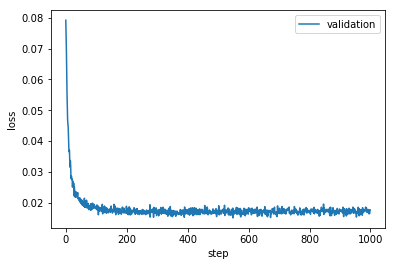

In [8]:
#R = get_data('ml-100k//u1.base')
#test = get_data('ml-100k//u1.test')
path = '/Users/limuyi/Desktop/git_4/ml-100k/'
R = get_data('%su1.base'%path)
test = get_data('%su1.test'%path)

N,M = R.shape
K = 5
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
step = 1000
aP,aQ = matrix_factorization(R,P,Q,K,test,step)

aR = np.dot(aP,aQ.T)

# 画图
plt.plot(step_list, loss_list,label='validation')
plt.ylabel('loss')
plt.xlabel('step')

plt.legend(loc="upper right")
plt.show()
